# Visualize Renko using ATR 

In [8]:
import datetime as dt
import pandas as pd
import mplfinance as fplt

In [9]:
ohlcv = pd.read_csv("minute.csv", parse_dates=["date"], index_col="date")
ohlcv.head(2)

,open,high,low,close
date,,,,
2022-09-09 09:15:00,17913,17925,17911,17918
2022-09-09 09:16:00,17917,17918,17902,17905


In [10]:
def ATR(df, range_period):
    df['High-Low']=df['high']-df['low']
    df['High-Previous_Close']=abs(df['high']-df['close'].shift(1))
    df['Low-Previous_Close']=abs(df['low']-df['close'].shift(1))
    df['True_Range']=df[['High-Low','High-Previous_Close','Low-Previous_Close']].max(axis=1,skipna=False)
    df['ATR'] = df['True_Range'].ewm(com=range_period,min_periods=range_period).mean()
    return df

In [11]:
bricks = round(ATR(ohlcv,50).iloc[-1]["ATR"],0) #capturing the latest ATR
#rounding off the result to an integer.
print(bricks)

6.0


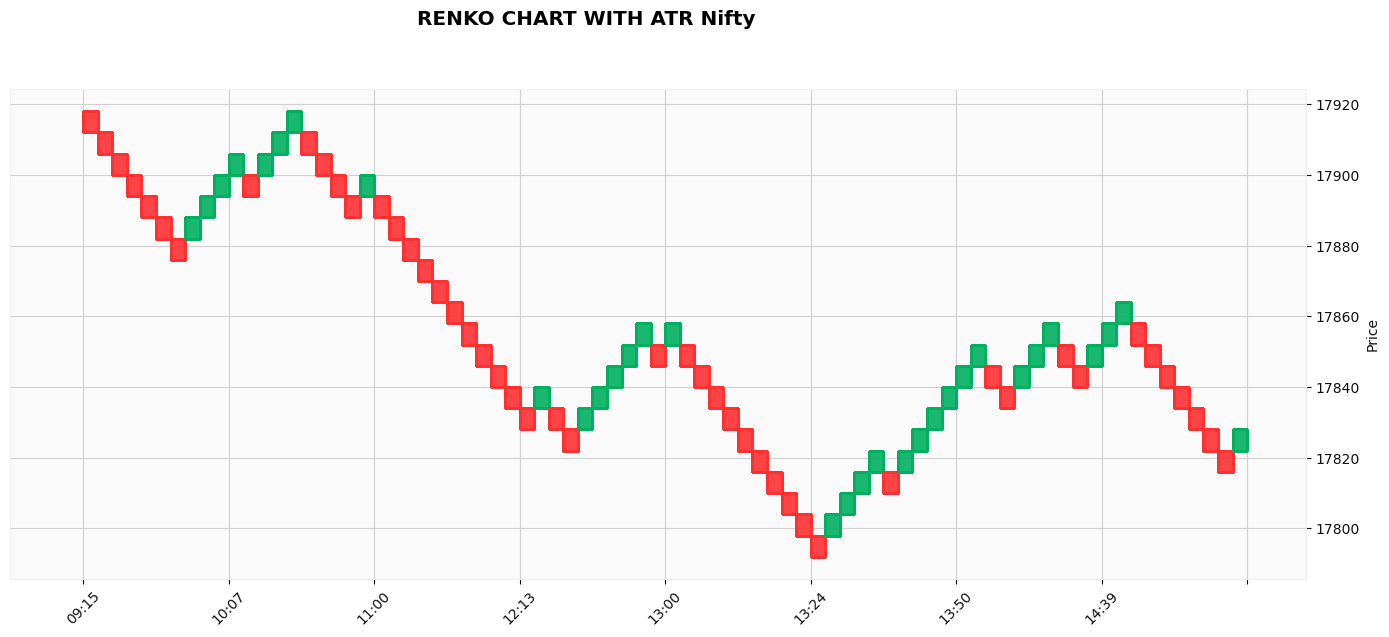

In [12]:
retvals = {}
fplt.plot(ohlcv,type='renko',renko_params=dict(brick_size=bricks, atr_length=14),
          style='yahoo',figsize =(18,7),
          title = "RENKO CHART WITH ATR {0}".format('Nifty'), return_calculated_values=retvals)

In [13]:
dfresult = pd.DataFrame(retvals)
dfresult[['renko_dates','renko_bricks']].head(5)

,renko_dates,renko_bricks
0,2022-09-09 09:15:00+00:00,17912.0
1,2022-09-09 09:15:00+00:00,17906.0
2,2022-09-09 09:16:00+00:00,17900.0
3,2022-09-09 09:17:00+00:00,17894.0
4,2022-09-09 09:20:00+00:00,17888.0


In [14]:
import numpy as np
dfresult['color'] = np.where(dfresult.renko_bricks >= dfresult.renko_bricks.shift(1),'Green','Red')
dfresult[['renko_dates','renko_bricks','color']].tail()

,renko_dates,renko_bricks,color
75,2022-09-09 15:15:00+00:00,17834.0,Red
76,2022-09-09 15:15:00+00:00,17828.0,Red
77,2022-09-09 15:19:00+00:00,17822.0,Red
78,2022-09-09 15:19:00+00:00,17816.0,Red
79,2022-09-09 15:26:00+00:00,17822.0,Green
